### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Яссин Мохамад Аламин
##### Группа:   НКНбд-01-20

## Москва 2023
***

# Вариант №12
Лабораторная работа 4


## Текст задания:

1. Набор данных: wine_quality 

2. Независимые признаки: features/density, features/fixed acidity 

3. Метка класса: quality 

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32. 


## Решение:

In [1]:
# Все imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

### 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса

In [2]:
ds = tfds.load("wine_quality", split='train')
df_origin = tfds.as_dataframe(ds)

In [3]:
df = df_origin[['features/density','features/fixed acidity','quality']]
df.columns = ['density','fixed_acidity','quality']
df.head()

,density,fixed_acidity,quality
0,1.00080,7.6,5
1,0.99110,6.3,6
2,0.99076,5.3,4
3,0.99672,6.6,6
4,0.99016,5.9,6


### 2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.



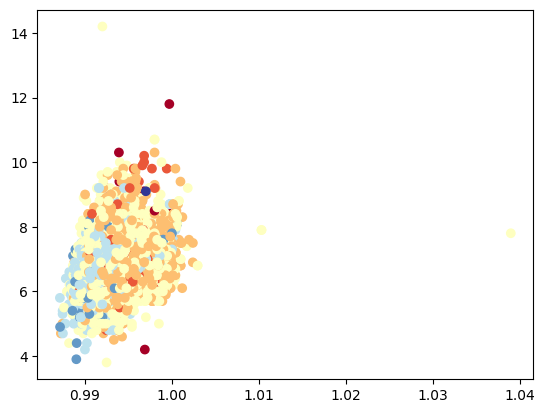

In [4]:
plt.scatter(df['density'], df['fixed_acidity'], c = df['quality'], cmap = plt.cm.RdYlBu)

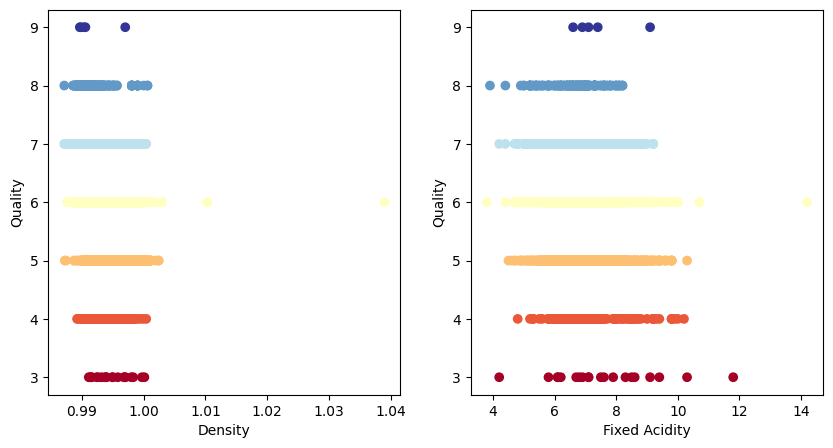

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first scatter plot with density on x-axis and quality on color
ax1.scatter(df['density'], df['quality'], c=df['quality'], cmap=plt.cm.RdYlBu)
ax1.set_xlabel('Density')
ax1.set_ylabel('Quality')

# Plot the second scatter plot with fixed acidity on x-axis and quality on color
ax2.scatter(df['fixed_acidity'], df['quality'], c=df['quality'], cmap=plt.cm.RdYlBu)
ax2.set_xlabel('Fixed Acidity')
ax2.set_ylabel('Quality')

plt.show()

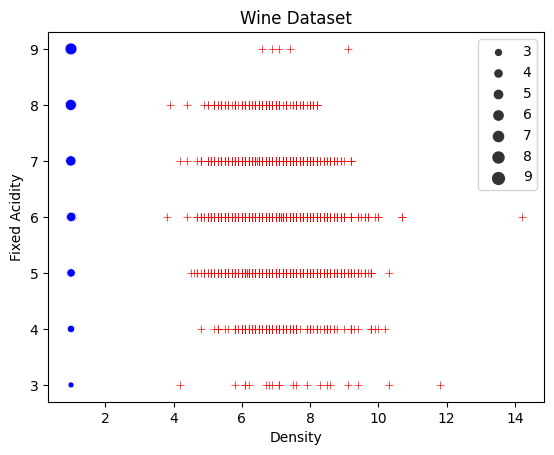

In [6]:
fig, ax =plt.subplots()
sns.scatterplot(data=df, x='density', y='quality', color='blue', size='quality')
sns.scatterplot(data=df, x='fixed_acidity', y='quality', color='red', marker='+')
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')
plt.title('Wine Dataset')
plt.show()

### 3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 



In [7]:
df.quality.unique()

array([5, 6, 4, 8, 7, 3, 9], dtype=int32)

In [8]:
df.head()

,density,fixed_acidity,quality
0,1.00080,7.6,5
1,0.99110,6.3,6
2,0.99076,5.3,4
3,0.99672,6.6,6
4,0.99016,5.9,6


Заметим, что выбор значения, где x>4, вообще не имеет логического смысла.

In [9]:
print((df['quality'].apply(lambda x: 1 if x > 4 else 0).value_counts()))
df.loc[:, 'quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)

1    4715
0     183
Name: quality, dtype: int64


<ipython-input-9-08da453a465f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)


In [10]:
df.head()

,density,fixed_acidity,quality
0,1.00080,7.6,0
1,0.99110,6.3,0
2,0.99076,5.3,0
3,0.99672,6.6,0
4,0.99016,5.9,0


In [11]:
df['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

* Поскольку между двумя признаками у меня большая разница, я попробовал выполнить oversampling, но это привело к ухудшению точности, так как данные перестали быть актуальными после объединения.

In [12]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#X, y = ros.fit_resample(df[['density','fixed_acidity']], df['quality'])
#y.value_counts()
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)


### 4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['density','fixed_acidity']],df['quality'], test_size=0.4, random_state=42)

In [14]:
X_train.shape

(2938, 2)

In [15]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([
    # At least I tried
    #tf.keras.layers.Dense(32, activation='relu',,kernel_initializer='he_normal'),
    #tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001),kernel_initializer='he_normal'),

    feature_normalizer,
    tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # counter overfitting if I planned to put a relatively large epochs number
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-2),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                        

* With sampling and regularization


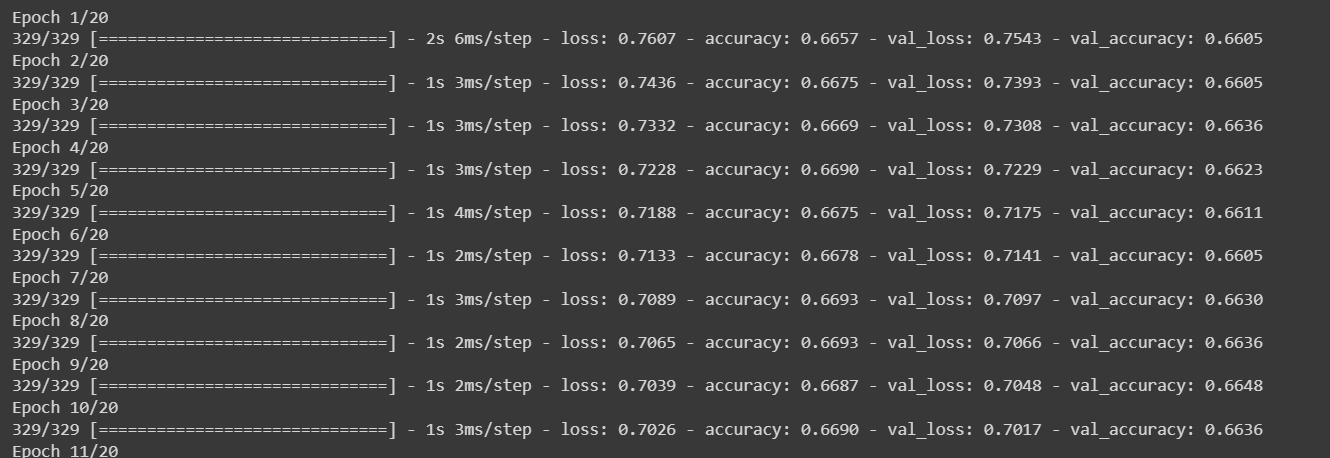

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    callbacks=[callback],
    batch_size=32
)

Epoch 1/50
92/92 [==============================] - 4s 11ms/step - loss: 0.5319 - accuracy: 0.7801 - val_loss: 0.5311 - val_accuracy: 0.7816
Epoch 2/50
92/92 [==============================] - 1s 11ms/step - loss: 0.5188 - accuracy: 0.7849 - val_loss: 0.5219 - val_accuracy: 0.7816
Epoch 3/50
92/92 [==============================] - 1s 13ms/step - loss: 0.5207 - accuracy: 0.7849 - val_loss: 0.5205 - val_accuracy: 0.7816
Epoch 4/50
92/92 [==============================] - 2s 17ms/step - loss: 0.5207 - accuracy: 0.7849 - val_loss: 0.5219 - val_accuracy: 0.7816
Epoch 5/50
92/92 [==============================] - 1s 12ms/step - loss: 0.5212 - accuracy: 0.7849 - val_loss: 0.5301 - val_accuracy: 0.7816
Epoch 6/50
92/92 [==============================] - 1s 10ms/step - loss: 0.5243 - accuracy: 0.7849 - val_loss: 0.5235 - val_accuracy: 0.7816
Epoch 7/50
92/92 [==============================] - 1s 8ms/step - loss: 0.5195 - accuracy: 0.7849 - val_loss: 0.5221 - val_accuracy: 0.7816
Epoch 8/50
92/

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

62/62 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7816


(0.5216358304023743, 0.781632661819458)


### 5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.


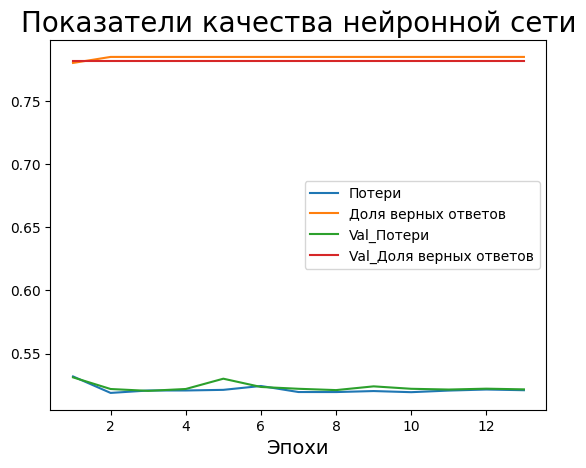

In [18]:
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], label='Потери')
plt.plot(np.arange(1, len(history.history['accuracy'])+1),history.history['accuracy'], label='Доля верных ответов')
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], label='Val_Потери')
plt.plot(np.arange(1, len(history.history['val_accuracy'])+1),history.history['val_accuracy'], label='Val_Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

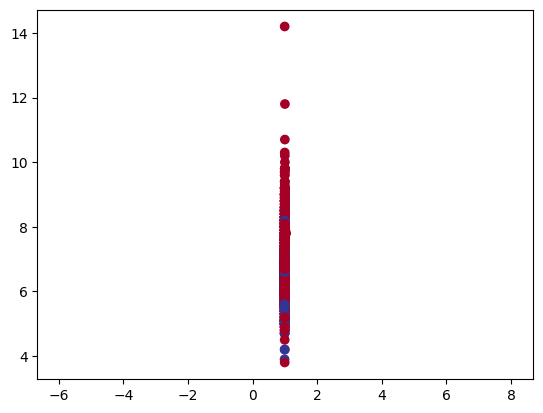

In [19]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = y_train, cmap = plt.cm.RdYlBu)
plt.axis('equal');

313/313 [==============================] - 1s 4ms/step


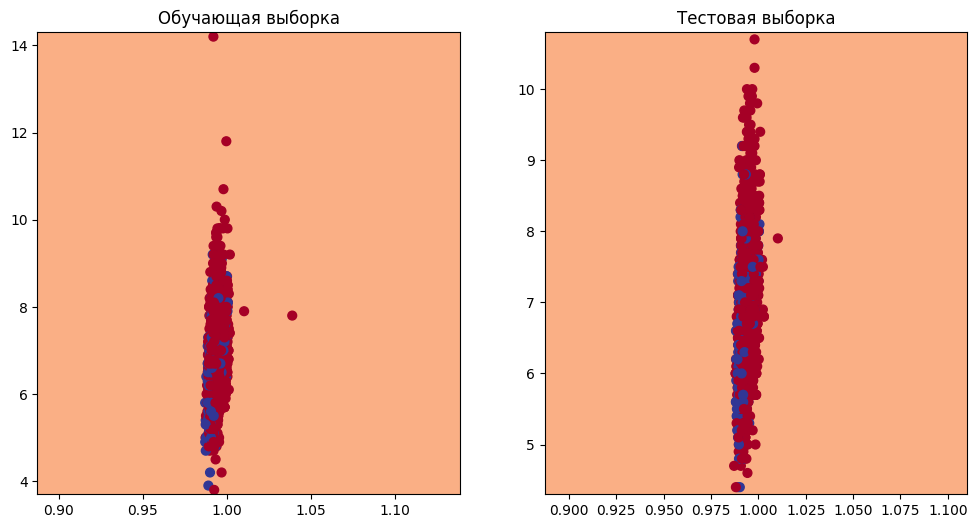

In [20]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()] 
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация 
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)

* Из-за выбранные даты в своем варианте
модель предсказала  0 ложноположительных результатов (FP) для отрицательного класса и 0 истинных положительных результатов (TP). Это означает, что модель очень хорошо предсказывает отрицательные образцы, но не может идентифицировать положительные образцы, поскольку нет истинно положительных результатов.

In [21]:
from sklearn.metrics import confusion_matrix
y_pred_binary = model.predict(X_train).round()
confusion_matrix(y_train, y_pred_binary)

92/92 [==============================] - 0s 1ms/step


array([[2306,    0],
       [ 632,    0]])

* когда я изменил процент данных в X и Y и сделал oversampling, у меня были такие результаты но при этом accuracy уменшлось.

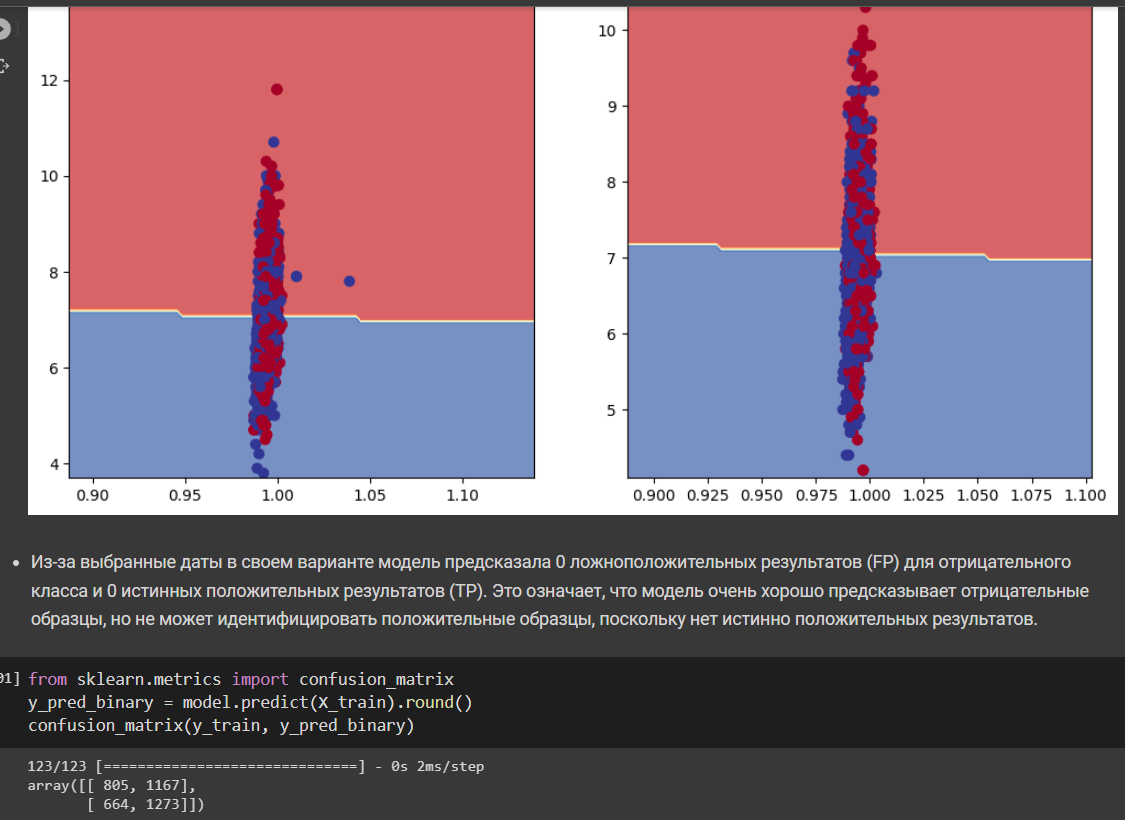


### 6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.



In [22]:
from sklearn.metrics import roc_auc_score,roc_curve

62/62 [==============================] - 0s 2ms/step


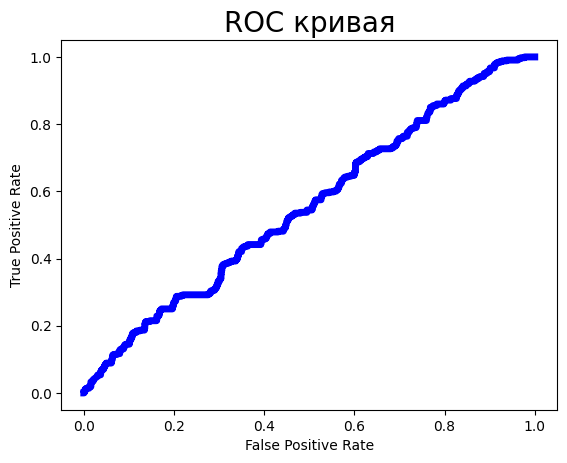

ROC-AUC score: 0.5543559820404578


In [23]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=5)
plt.title('ROC кривая', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC score:', roc_auc)


### 7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 



In [24]:
X = np.array(df_origin.drop('quality', axis=1))
y = np.array(df['quality']) # Суда не надо df_origin чтьбы не делить по Y заново

In [25]:
X.shape

(4898, 11)

In [26]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)

In [27]:
model_aux = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_aux.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 11)               3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 32)                384       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 420
Trainable params: 417
Non-trainable params: 3
_________________________________________________________________


In [28]:
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X, y, epochs=500, verbose=0);

In [29]:
columns=df_origin.columns
columns

Index(['features/alcohol', 'features/chlorides', 'features/citric acid',
       'features/density', 'features/fixed acidity',
       'features/free sulfur dioxide', 'features/pH',
       'features/residual sugar', 'features/sulphates',
       'features/total sulfur dioxide', 'features/volatile acidity',
       'quality'],
      dtype='object')

На лекции нам был необходим только выходной слой, но здесь требуется создание нейронной сети с одним слоем и одним выходным узлом (с функцией активации sigmoid). В связи с этим, представленный ниже код демонстрирует, какой признак является наиболее важным.

In [30]:
###
weights = model.get_weights()
max_weight_index = np.argmax(np.abs(weights[0]))
print('The most important additional feature:', columns[max_weight_index])

The most important additional feature: features/alcohol


### 8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.



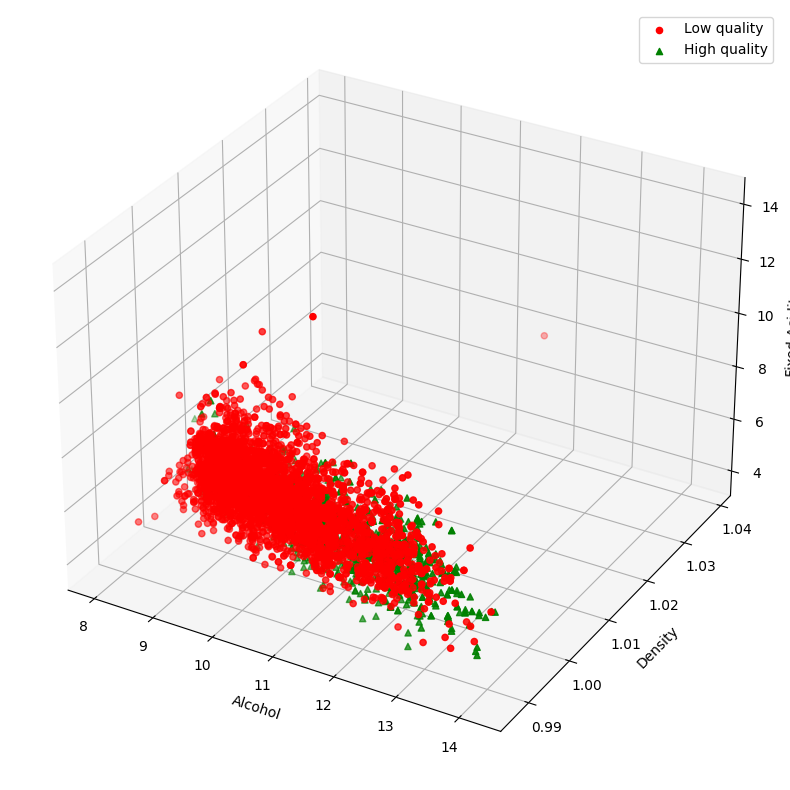

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_origin['features/alcohol'][y==0], df_origin['features/density'][y==0], df_origin['features/fixed acidity'][y==0], c='r', marker='o', label='Low quality')
ax.scatter(df_origin['features/alcohol'][y==1], df_origin['features/density'][y==1], df_origin['features/fixed acidity'][y==1], c='g', marker='^', label='High quality')

# Подписываем оси и добавляем легенду
ax.set_xlabel('Alcohol')
ax.set_ylabel('Density')
ax.set_zlabel('Fixed Acidity')
ax.legend()

plt.show()

### 9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.


In [32]:
X=df_origin.drop('quality',axis=1)
y=df_origin['quality']
y.unique()

array([5, 6, 4, 8, 7, 3, 9], dtype=int32)

In [33]:
def to_one_hot(labels, dimension=7):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label-3] = 1.
    return results

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print(X_train.shape, y_test.shape)
y_train = to_one_hot(y_train,7)
y_test = to_one_hot(y_test,7)
y_test.shape

(3281, 11) (1617,)


(1617, 7)

In [35]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([

    feature_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    batch_size=32
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 11)               3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 32)                384       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                      

### 10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

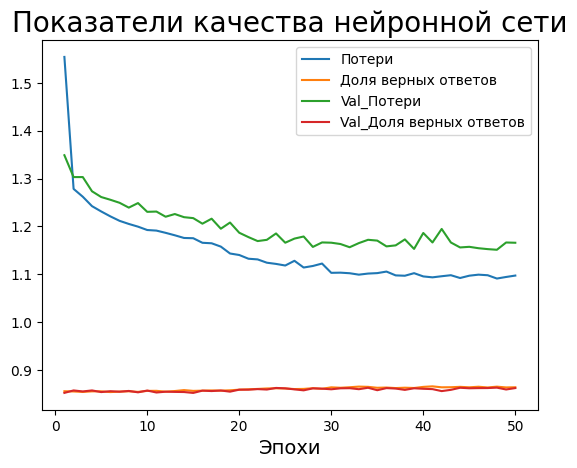

In [36]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(np.arange(1, len(loss)+1), loss, label='Потери')
plt.plot(np.arange(1, len(acc)+1),acc, label='Доля верных ответов')
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label='Val_Потери')
plt.plot(np.arange(1, len(val_acc)+1),val_acc, label='Val_Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

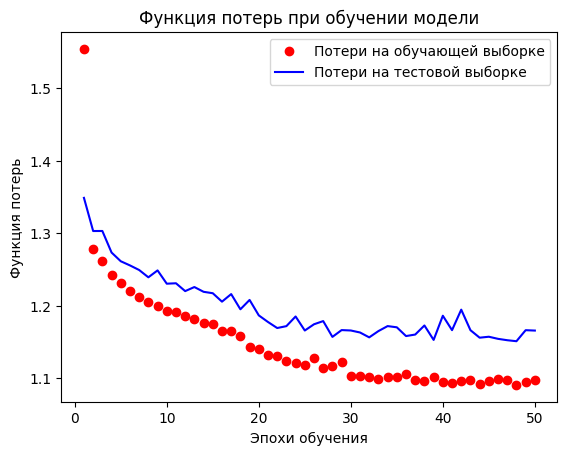

In [37]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "ro", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();